In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 변수 정의

num = 10
num_coeffs = 1
epochs = 1000
learning_rate = 0.2

In [3]:
# cost 저장

n10_train_cost = []
n20_train_cost = []
n100_train_cost = []

n10_test_cost = []
n20_test_cost = []
n100_test_cost = []

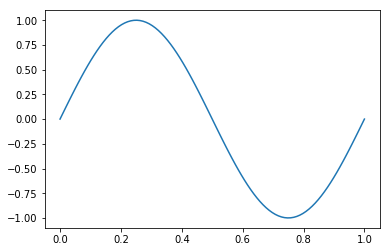

In [5]:
# 정상적인 sin(2πx)의 그래프

sinx = np.linspace(0.0, 1.0, 100)
siny = np.sin(2 * np.pi * sinx)

plt.plot(sinx, siny)
plt.savefig('sin.png')
plt.show()

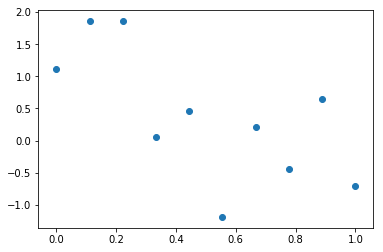

In [6]:
# sin + noise 그래프
# 랜덤 노이즈 생성하는 부분

train_x = np.linspace(0.0, 1.0, num)
#n = np.random.uniform(-0.5, 0.5, num)
n = np.random.normal(0.0, 1.0, num)
train_y = np.sin(2 * np.pi * train_x)
train_y += n

plt.scatter(train_x, train_y)
plt.savefig('train10.png')
plt.show()

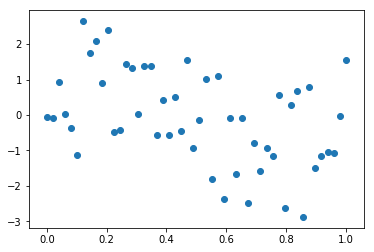

In [7]:
# 테스트 데이터 만들기
test_num = 50

test_x = np.linspace(0.0, 1.0, test_num)
#n = np.random.uniform(-0.5, 0.5, test_num)
n = np.random.normal(0.0, 1.0, test_num)
test_y = np.sin(2 * np.pi * test_x)
test_y += n

plt.scatter(test_x, test_y)
plt.savefig('test.png')
plt.show()

In [9]:
num = 10
num_coeffs = 1

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')

# cost 함수
cost = tf.sqrt(tf.reduce_sum(tf.pow(Y_pred - Y, 2)))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    y = []
    for i in range(num):
        y.append(sess.run(Y_pred, feed_dict={X:train_x}))
    plt.plot(train_x, y, color='red', label='prediction')
    
    # cost 저장
    n10_train_cost.append(c)
    n10_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    #plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
    

epoch : 0, cost : 3.07038
epoch : 100, cost : 3.31487
epoch : 200, cost : 3.31487
epoch : 300, cost : 3.31487
epoch : 400, cost : 3.31487
epoch : 500, cost : 3.31487
epoch : 600, cost : 3.31487
epoch : 700, cost : 3.31487
epoch : 800, cost : 3.31487
epoch : 900, cost : 3.31487


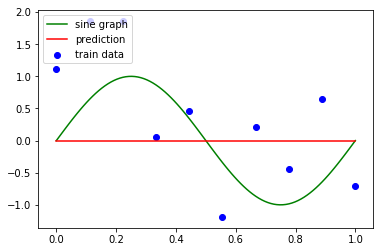

In [10]:
plt.savefig('train10_m0.png')
plt.show()

In [11]:
num = 10
num_coeffs = 2

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)

# cost 함수
cost = tf.sqrt(tf.reduce_sum(tf.pow(Y_pred - Y, 2)))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작

with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))

    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    # cost 저장
    n10_train_cost.append(c)
    n10_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    #plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)    

epoch : 0, cost : 2.83083
epoch : 100, cost : 2.50249
epoch : 200, cost : 2.50246
epoch : 300, cost : 2.50244
epoch : 400, cost : 2.50242
epoch : 500, cost : 2.50241
epoch : 600, cost : 2.50239
epoch : 700, cost : 2.50237
epoch : 800, cost : 2.50235
epoch : 900, cost : 2.50233


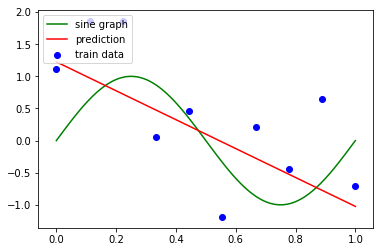

In [12]:
plt.savefig('train10_m1.png')
plt.show()

In [13]:
num = 10
num_coeffs = 3

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.sqrt(tf.reduce_sum(tf.pow(Y_pred - Y, 2)))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))

    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    # cost 저장
    n10_train_cost.append(c)
    n10_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    #plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)    

epoch : 0, cost : 2.85897
epoch : 100, cost : 2.52174
epoch : 200, cost : 2.59232
epoch : 300, cost : 2.53716
epoch : 400, cost : 2.63391
epoch : 500, cost : 2.38273
epoch : 600, cost : 2.30742
epoch : 700, cost : 2.39958
epoch : 800, cost : 2.48799
epoch : 900, cost : 2.28844


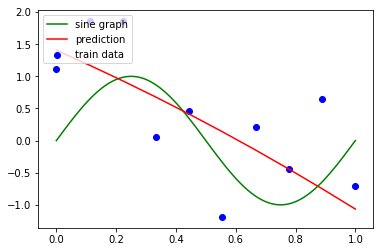

In [14]:
plt.savefig('train10_m2.png')
plt.show()

In [15]:
num = 10
num_coeffs = 9

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.sqrt(tf.reduce_sum(tf.pow(Y_pred - Y, 2)))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))

    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
       
    # cost 저장
    n10_train_cost.append(c)
    n10_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    #plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)    

epoch : 0, cost : 3.71638
epoch : 100, cost : 3.20953
epoch : 200, cost : 3.29735
epoch : 300, cost : 2.84506
epoch : 400, cost : 2.80931
epoch : 500, cost : 2.5988
epoch : 600, cost : 3.1766
epoch : 700, cost : 1.96655
epoch : 800, cost : 2.60109
epoch : 900, cost : 3.18065


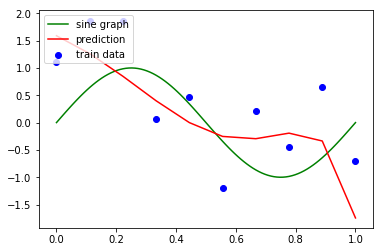

In [16]:
plt.savefig('train10_m8.png')
plt.show()

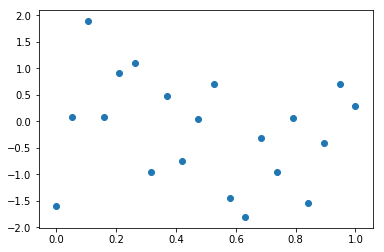

In [18]:
# sin + noise 그래프
# 랜덤 노이즈 생성하는 부분

num = 20

train_x = np.linspace(0.0, 1.0, num)
#n = np.random.uniform(-0.5, 0.5, num)
n = np.random.normal(0.0, 1.0, num)
train_y = np.sin(2 * np.pi * train_x)
train_y += n

plt.scatter(train_x, train_y)
plt.savefig('train20.png')
plt.show()

In [19]:
num = 20
num_coeffs = 1

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')

# cost 함수
cost = tf.sqrt(tf.reduce_sum(tf.pow(Y_pred - Y, 2)))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    y = []
    for i in range(num):
        y.append(sess.run(Y_pred, feed_dict={X:train_x}))
    plt.plot(train_x, y, color='red', label='prediction')
    
    # cost 저장
    n20_train_cost.append(c)
    n20_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    #plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    

epoch : 0, cost : 4.39627
epoch : 100, cost : 4.39627
epoch : 200, cost : 4.39627
epoch : 300, cost : 4.39627
epoch : 400, cost : 4.39627
epoch : 500, cost : 4.39627
epoch : 600, cost : 4.39627
epoch : 700, cost : 4.39627
epoch : 800, cost : 4.39627
epoch : 900, cost : 4.39627


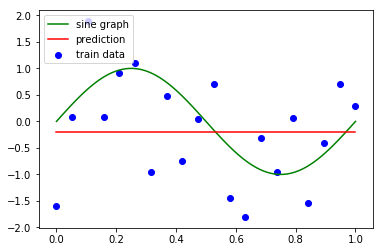

In [20]:
# 그래프 출력
plt.savefig('train20_m0.png')
plt.show()

In [22]:
num = 20
num_coeffs = 2

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.sqrt(tf.reduce_sum(tf.pow(Y_pred - Y, 2)))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    # cost 저장
    n20_train_cost.append(c)
    n20_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    #plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)

epoch : 0, cost : 4.43283
epoch : 100, cost : 5.02623
epoch : 200, cost : 4.92155
epoch : 300, cost : 4.82467
epoch : 400, cost : 5.13821
epoch : 500, cost : 5.02622
epoch : 600, cost : 4.92155
epoch : 700, cost : 4.82467
epoch : 800, cost : 5.13821
epoch : 900, cost : 5.02622


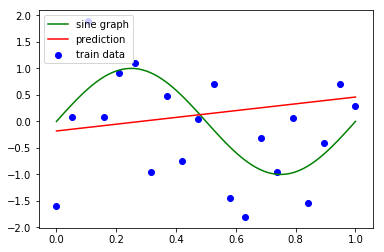

In [23]:
# 그래프 출력
plt.savefig('train20_m1.png')
plt.show()

In [24]:
num = 20
num_coeffs = 3

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.sqrt(tf.reduce_sum(tf.pow(Y_pred - Y, 2)))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))

    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    # cost 저장
    n20_train_cost.append(c)
    n20_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    #plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    

epoch : 0, cost : 4.56875
epoch : 100, cost : 4.31616
epoch : 200, cost : 4.33133
epoch : 300, cost : 4.65464
epoch : 400, cost : 4.31368
epoch : 500, cost : 4.33054
epoch : 600, cost : 4.64624
epoch : 700, cost : 4.31161
epoch : 800, cost : 4.33016
epoch : 900, cost : 4.6382


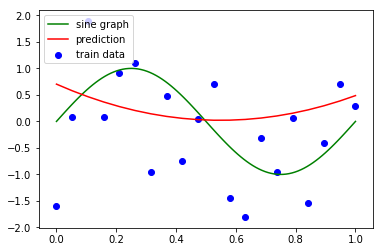

In [25]:
# 그래프 출력
plt.savefig('train20_m2.png')
plt.show()

In [26]:
num = 20
num_coeffs = 9

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.sqrt(tf.reduce_sum(tf.pow(Y_pred - Y, 2)))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))

    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    # cost 저장
    n20_train_cost.append(c)
    n20_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    #plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)

epoch : 0, cost : 7.45294
epoch : 100, cost : 4.54407
epoch : 200, cost : 4.55611
epoch : 300, cost : 4.27384
epoch : 400, cost : 4.09943
epoch : 500, cost : 4.31257
epoch : 600, cost : 4.48346
epoch : 700, cost : 4.0216
epoch : 800, cost : 4.21818
epoch : 900, cost : 4.01897


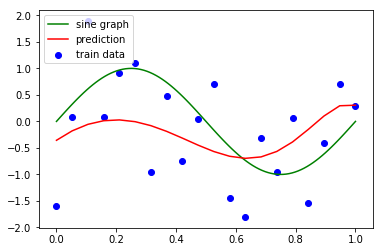

In [27]:
# 그래프 출력
plt.savefig('train20_m8.png')
plt.show()

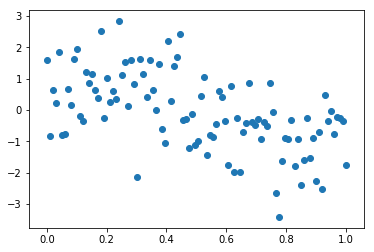

In [28]:
# sin + noise 그래프
# 랜덤 노이즈 생성하는 부분

num = 100

train_x = np.linspace(0.0, 1.0, num)
#n = np.random.uniform(-0.5, 0.5, num)
n = np.random.normal(0.0, 1.0, num)
train_y = np.sin(2 * np.pi * train_x)
train_y += n

plt.scatter(train_x, train_y)
plt.savefig('train100.png')
plt.show()

In [29]:
num = 100
num_coeffs = 1

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')

# cost 함수
cost = tf.sqrt(tf.reduce_sum(tf.pow(Y_pred - Y, 2)))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    y = []
    for i in range(num):
        y.append(sess.run(Y_pred, feed_dict={X:train_x}))
    plt.plot(train_x, y, color='red', label='prediction')
    
    # cost 저장
    n100_train_cost.append(c)
    n100_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    #plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)

epoch : 0, cost : 13.5938
epoch : 100, cost : 13.5938
epoch : 200, cost : 13.5938
epoch : 300, cost : 13.5938
epoch : 400, cost : 13.5938
epoch : 500, cost : 13.5938
epoch : 600, cost : 13.5938
epoch : 700, cost : 13.5938
epoch : 800, cost : 13.5938
epoch : 900, cost : 13.5938


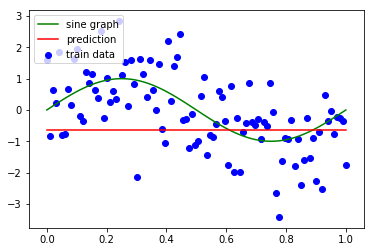

In [30]:
# 그래프 출력
plt.savefig('train100_m0.png')
plt.show()

In [31]:
num = 100
num_coeffs = 2

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.sqrt(tf.reduce_sum(tf.pow(Y_pred - Y, 2)))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    # cost 저장
    n100_train_cost.append(c)
    n100_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    #plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    

epoch : 0, cost : 11.0646
epoch : 100, cost : 11.1127
epoch : 200, cost : 10.7346
epoch : 300, cost : 10.7857
epoch : 400, cost : 11.1125
epoch : 500, cost : 10.7346
epoch : 600, cost : 10.7857
epoch : 700, cost : 11.1125
epoch : 800, cost : 10.7346
epoch : 900, cost : 10.7857


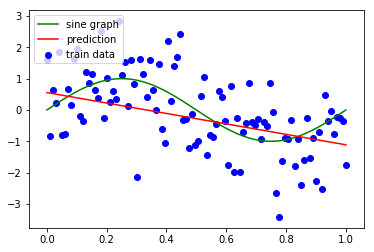

In [32]:
# 그래프 출력
plt.savefig('train100_m1.png')
plt.show()  

In [33]:
num = 100
num_coeffs = 3

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.sqrt(tf.reduce_sum(tf.pow(Y_pred - Y, 2)))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    # cost 저장
    n100_train_cost.append(c)
    n100_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    #plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
        

epoch : 0, cost : 14.0313
epoch : 100, cost : 10.441
epoch : 200, cost : 10.4594
epoch : 300, cost : 10.6855
epoch : 400, cost : 10.6145
epoch : 500, cost : 10.7156
epoch : 600, cost : 11.3178
epoch : 700, cost : 10.7247
epoch : 800, cost : 10.8091
epoch : 900, cost : 10.5233


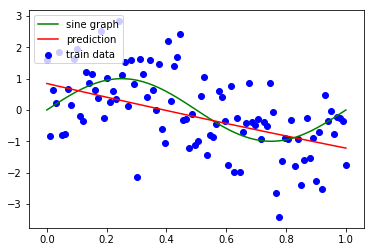

In [34]:
# 그래프 출력
plt.savefig('train100_m2.png')
plt.show()  

In [35]:
num = 100
num_coeffs = 9

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)  
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)
    
# cost 함수
cost = tf.sqrt(tf.reduce_sum(tf.pow(Y_pred - Y, 2)))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

# 세션 시작
with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
               
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    # cost 저장
    n100_train_cost.append(c)
    n100_test_cost.append(sess.run(cost, feed_dict={X:test_x, Y:test_y}))
    #plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
        

epoch : 0, cost : 12.1136
epoch : 100, cost : 12.044
epoch : 200, cost : 11.654
epoch : 300, cost : 12.7982
epoch : 400, cost : 10.5506
epoch : 500, cost : 12.269
epoch : 600, cost : 12.295
epoch : 700, cost : 10.6761
epoch : 800, cost : 11.6498
epoch : 900, cost : 11.552


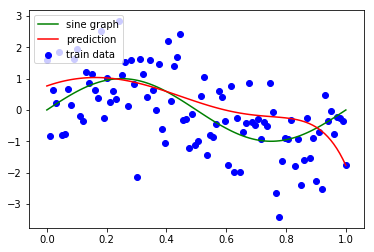

In [36]:
# 그래프 출력
plt.savefig('train100_m8.png')
plt.show()  

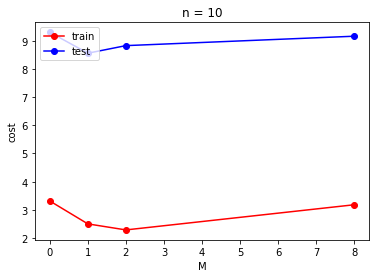

In [44]:
# n이 10일때 error 그래프

x = [0, 1, 2, 8]

plt.plot(x,  n10_train_cost, 'o-', color='red', label='train')
plt.plot(x, n10_test_cost, 'o-', color='blue', label='test')
plt.title('n = 10')
plt.xlabel('M')
plt.ylabel('cost')
plt.legend(loc=2)
plt.savefig('n10_error.png')
plt.show()

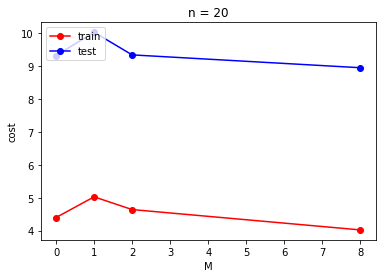

In [45]:
# n = 20일때 error 그래프

x = [0, 1, 2, 8]

plt.plot(x, n20_train_cost, 'o-', color='red', label='train')
plt.plot(x, n20_test_cost, 'o-', color='blue', label='test')
plt.title('n = 20')
plt.xlabel('M')
plt.ylabel('cost')
plt.legend(loc=2)
plt.savefig('n20_error.png')
plt.show()

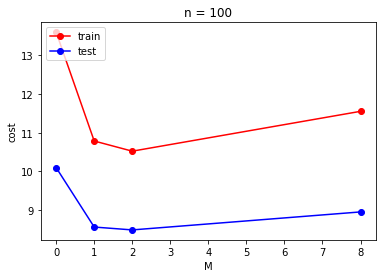

In [46]:
# n = 100일때 error 그래프

x = [0, 1, 2, 8]

plt.plot(x, n100_train_cost, 'o-', color='red', label='train')
plt.plot(x, n100_test_cost, 'o-', color='blue', label='test')
plt.title('n = 100')
plt.xlabel('M')
plt.ylabel('cost')
plt.legend(loc=2)
plt.savefig('n100_error.png')
plt.show()